To predict the sale price of the house. 

The issue here is the test dataset has no Y-values, meaning that we have to generate it. 

Since this is to predict numerical variables our viable algorithms are:
Linear regression (Most possible)
Random forest/Decision Tree (Saw from Google)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
training = pd.read_csv('train.csv')

In [3]:
training.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
training.columns 

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
import seaborn as sns
%matplotlib inline

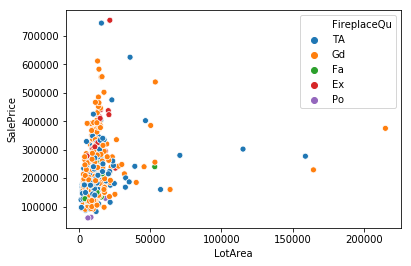

In [7]:
sns.scatterplot('LotArea','SalePrice', data= training, hue = 'FireplaceQu')

# Question:
Is there are a relationship between year built and sale price?

In [ ]:
sns.scatterplot('YearBuilt','SalePrice',data=training)

There appears to be a small curve (exponential) trend in regards to the two variables 


The codes below will be data wrangling

In [ ]:
training.isnull().any()

To see how much missing values each column has, a heat map can help us visualise this much better.

For any columns that has too much missing values, dropping the column is the best option, while other numerical value data with few or moderate amout of missing data can either be replaced with 0 or the mean of the column.

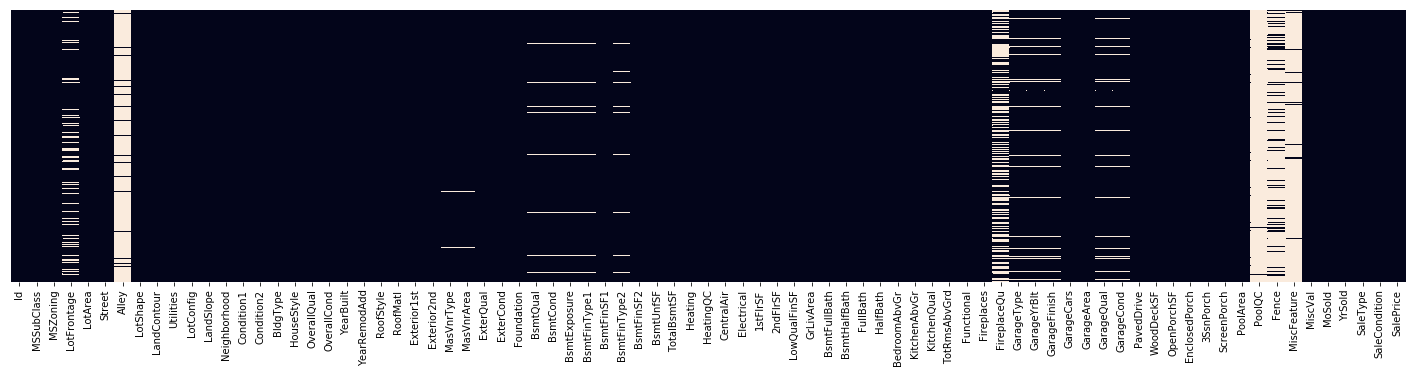

In [8]:
plt.figure(figsize= (25, 5))
sns.heatmap(training.isnull(),yticklabels=False,cbar=False)

Alley, PoolQC, Fence and MiscFeature have too much missing values to replace, for now it is decided that we should drop these columns.

In [10]:
print(training['PoolQC'])
print(training['MiscVal'])

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
       ... 
1430    NaN
1431    NaN
1432    NaN
1433    NaN
1434    NaN
1435    NaN
1436    NaN
1437    NaN
1438    NaN
1439    NaN
1440    NaN
1441    NaN
1442    NaN
1443    NaN
1444    NaN
1445    NaN
1446    NaN
1447    NaN
1448    NaN
1449    NaN
1450    NaN
1451    NaN
1452    NaN
1453    NaN
1454    NaN
1455    NaN
1456    NaN
1457    NaN
1458    NaN
1459    NaN
Name: PoolQC, Length: 1460, dtype: object
0          0
1          0
2          0
3          0
4          0
5        700
6          0
7        350
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16       700
17   

In [12]:
training.drop(['PoolQC', 'Alley'], axis = 1, inplace= True)

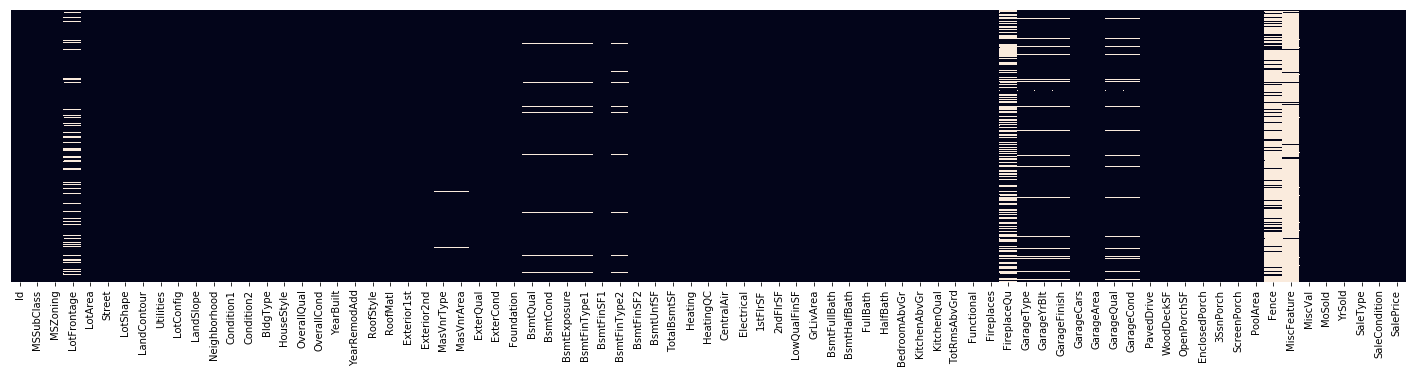

In [13]:
plt.figure(figsize= (25, 5))
sns.heatmap(training.isnull(),yticklabels=False,cbar=False)

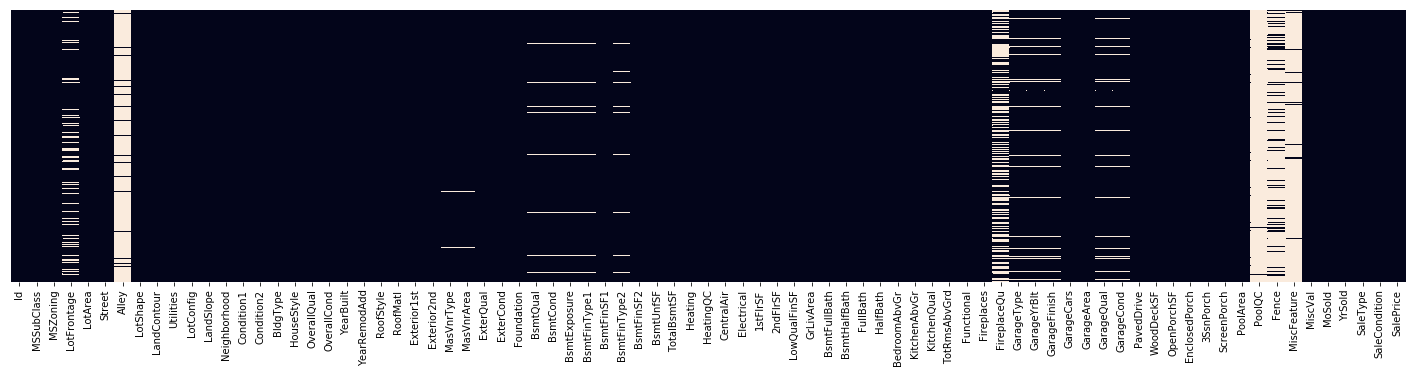

In [8]:
plt.figure(figsize= (25, 5))
sns.heatmap(training.isnull(),yticklabels=False,cbar=False)

There is also a quite a number of missing values and a lot of variables that can be changed to dummy variables.

However I propose a different option, instead of creating dummy variables, I will just change all text to numerical since it follows logic

In [ ]:
training.drop(['MiscFeature'], axis= 1, inplace=True)

In [ ]:
plt.figure(figsize= (25, 5))
sns.heatmap(training.isnull(),yticklabels=False,cbar=False)

In [ ]:
training.drop(['Fence'], axis = 1, inplace = True)

In [ ]:
plt.figure(figsize=(25,5))
sns.heatmap(training.isnull(),yticklabels=False,cbar=False)

In [ ]:
training.drop(['FireplaceQu'],axis = 1, inplace = True)

In [ ]:
plt.figure(figsize=(25,5))
sns.heatmap(training.isnull(),yticklabels=False,cbar=False)

In [ ]:
mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}

training = training.replace({'ExterQual': mapping, 'ExterCond': mapping,'BsmtQual': mapping, 'BsmtCond':mapping, 'HeatingQC':mapping, 
'KitchenQual': mapping, 'FireplaceQu': mapping, 'GarageQual': mapping, 'GarageCond': mapping})

Creating a mapping dictionary to correspond numeric with the text and replacing text with numerics 

In [ ]:
print(training['ExterQual'])

In [ ]:
training = training.fillna(0)

In [ ]:
plt.figure(figsize=(25,5))
sns.heatmap(training.isnull(),yticklabels=False,cbar=False)

All the above are data wrangling 

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [ ]:
training.info()

In [ ]:
# This is for making a quick model
# Starting with removing all object column 
training_drop = training.select_dtypes(['float64','int64'])

In [ ]:
X = training_drop
Y = training['SalePrice']

In [ ]:
lm.fit(X,Y)

In [ ]:
Test = pd.read_csv('test.csv')

Test = Test.drop(['PoolQC','Alley','MiscFeature','Fence','FireplaceQu'],axis=1)
Test = Test.fillna(0)

TestFitdata = Test.replace({'ExterQual': mapping, 'ExterCond': mapping,'BsmtQual': mapping, 'BsmtCond':mapping, 'HeatingQC':mapping, 
'KitchenQual': mapping, 'FireplaceQu': mapping, 'GarageQual': mapping, 'GarageCond': mapping})
TestFitdata = TestFitdata.select_dtypes(['float64','int64'])

In [ ]:
print(TestFitdata.shape)
print(TestFitdata.columns)
print(training_drop.shape)
print(training_drop.columns)

In [ ]:
Prediction = lm.predict(TestFitdata)

In [ ]:
sns.scatterplot(Prediction)

In [ ]:
#sns.distplot((y_test - prediction))

In [ ]:
from sklearn import metrics 
import numpy as np

In [ ]:
#print('MAE: ', metrics.mean_absolute_error(y_test, prediction))
#print('MSE: ', metrics.mean_squared_error(y_test, prediction))
#print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))